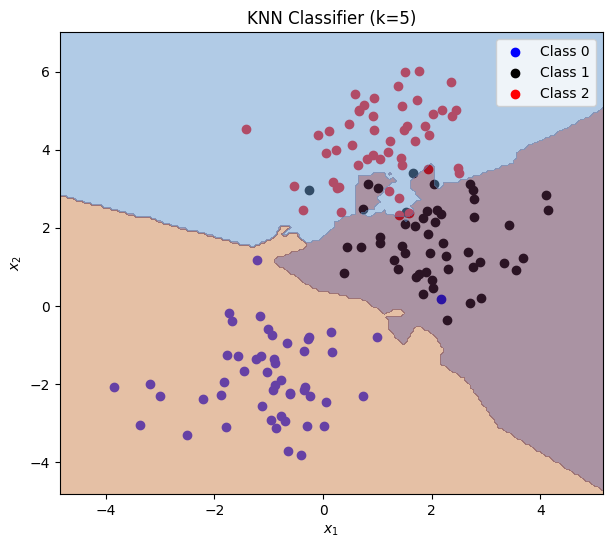

In [368]:

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Oct  8 17:37:29 2025

@author: sevak
"""

import numpy as np
import matplotlib.pyplot as plt

# *************  Generate simple 2D training data *************
np.random.seed(1836)

# Two Gaussian clusters
class0 = np.random.randn(50, 2) + np.array([-1, -2])
class1 = np.random.randn(50, 2) + np.array([2, 2])
class2 = np.random.randn(50, 2) + np.array([1, 4])

X_train = np.vstack((class0, class1, class2))
y_train = np.array([0]*50 + [1]*50 + [2]*50)

# ************* Implement your KNN classifier function here*************
def knn_predict(x, X_train, y_train, k=5):

    distance = []
    for i in X_train:
        distance.append(np.sqrt(np.dot((i-x),(i-x))))
            
    neighbour = sorted(list(enumerate(distance)), key=lambda x: x[1])[0:k]
    label = mejority_count(neighbour)
    return label

def mejority_count(n_neighbor):
    count_0 = 0
    count_1 = 0
    count_2 = 0
    for i in n_neighbor:
        if y_train[i[0]] == 0:
                count_0 += 1
        elif y_train[i[0]] == 1:
                count_1 += 1
        else:
                count_2 += 1
    maxi = max(count_0,count_1,count_2)
    if count_0 == maxi:
            return 0
    elif count_1 == maxi:
            return 1
    else:
        return 2
     # return the label for the point x
     
 
 
# *************  Plot of the datapoints *************
plt.figure(figsize=(7, 6))
plt.scatter(class0[:, 0], class0[:, 1], color='blue', label='Class 0')
plt.scatter(class1[:, 0], class1[:, 1], color='black', label='Class 1')
plt.scatter(class2[:, 0], class2[:, 1], color='red', label='Class 2')

# *************  Predict over a grid to visualize decision boundary *************
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = np.array([knn_predict(x, X_train, y_train, 3) for x in grid_points])
Z = Z.reshape(xx.shape)

# *************  Plot results *************


# ----------Uncomment below line after you implment the KNN classifier function
plt.contourf(xx, yy, Z, levels=[-0.5, 0.5, 1.5, 2.5 ], cmap='managua', alpha=0.5)
# ----------Uncomment above line after you implment the KNN classifier function


plt.title("KNN Classifier (k=5)")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show()

In [333]:
a = 2
b = 3
c = 4
max(a,b,c)

4

In [310]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [311]:
data = pd.read_csv('./Dataset/Social_Network_Ads.csv')

In [312]:
data.drop('User ID', axis=1, inplace=True)

In [313]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [314]:
encoder = LabelEncoder()

data['Gender'] = encoder.fit_transform(data['Gender'])

In [315]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [316]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [317]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [318]:
X_train[288]

array([-0.98019606, -0.15807423, -0.46227625])

In [319]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [320]:
KNn = KNeighborsClassifier(n_neighbors = 5)
KNn.fit(X_train,y_train)
y_pred = KNn.predict(X_test)
accuracy_score(y_test,y_pred)

0.95

In [321]:
class KNN:
    def __init__(self,N_neighbour):
        self.N_neighbour = N_neighbour
        self.x_train = None
        self.y_train = None

    def train(self,x_train,y_train):
        self.x_train = x_train
        self.y_train = y_train
    def predict(self,x_test):
        y_pre = []
        for j in x_test:
            distance = []
            for i in self.x_train:
                distance.append(np.sqrt(np.dot((i-j),(i-j))))
            
            neighbour = sorted(list(enumerate(distance)), key=lambda x: x[1])[0:self.N_neighbour]
            y_pre.append(self.mejority_count(neighbour))
        return np.array(y_pred)


    def mejority_count(self,n_neighbor):
            count_0 = 0
            count_1 = 0
            for i in n_neighbor:
                if self.y_train[i[0]] == 0:
                    count_0 += 1
                else:
                    count_1 += 1
            return 0 if count_0 > count_1 else 1



In [322]:
X_train.shape

y_train.shape

(320,)

In [323]:
k = KNN(5)

k.train(X_train,y_train)
accuracy_score(y_test,k.predict(X_test))

0.95